In [2]:
# 2 - EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")

# Load cleaned data
listings_clean = pd.read_csv("/Users/thomassimmons/airbnb-boston-analysis/data/cleaned/listings_cleaned.csv")

# Create new folder for figures
os.makedirs("figures", exist_ok=True)

/var/folders/kf/nt6wlgn90dvc9wsk7ttkqs4w0000gn/T/ipykernel_52771/2973810119.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neigh_counts, y=neigh_counts.index, palette="viridis")


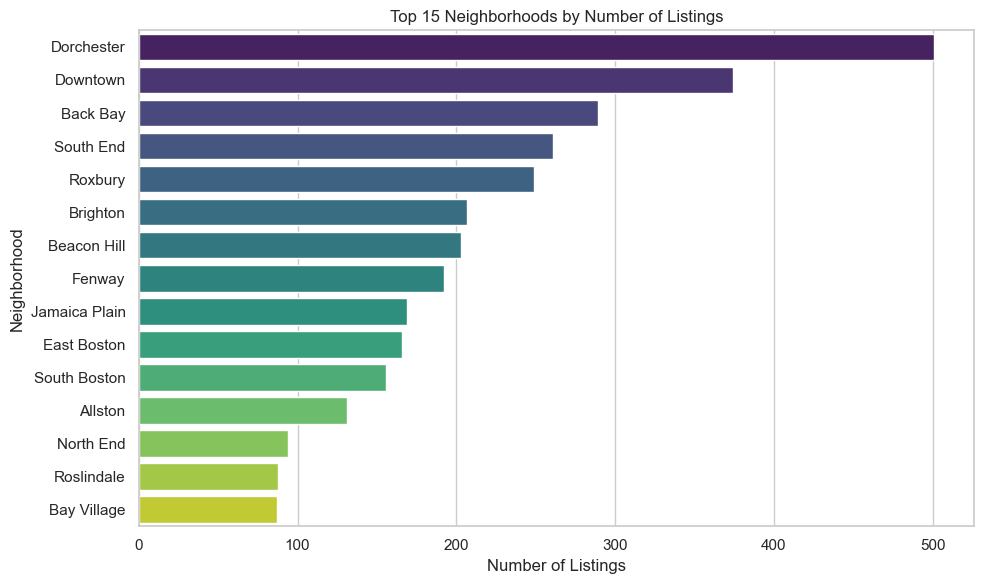

In [3]:
# Top 15 neighborhoods by listing count

plt.figure(figsize=(10,6))
neigh_counts = listings_clean['neighbourhood'].value_counts().head(15)
sns.barplot(x=neigh_counts, y=neigh_counts.index, palette="viridis")
plt.title("Top 15 Neighborhoods by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.savefig("figures/listings_by_neighborhood.png")
plt.show()

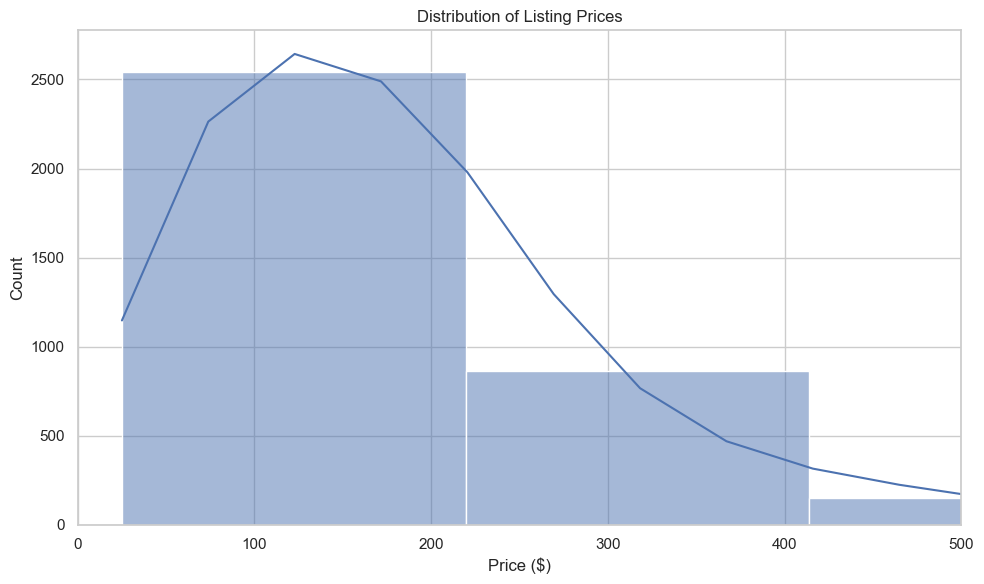

In [4]:
# Price distribution 

plt.figure(figsize=(10,6))
sns.histplot(listings_clean['price'], bins=50, kde=True)
plt.title("Distribution of Listing Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.xlim(0, 500)
plt.tight_layout()
plt.savefig("figures/price_distribution.png")
plt.show()

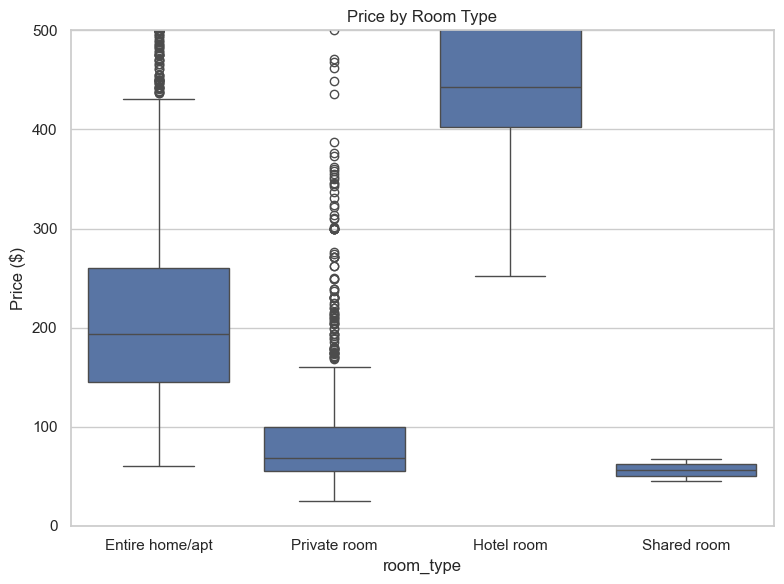

In [6]:
# Boxplot - price by room type

plt.figure(figsize = (8,6))
sns.boxplot(data=listings_clean, x = 'room_type', y = 'price')
plt.title("Price by Room Type")
plt.ylabel("Price ($)")
plt.ylim(0, 500)
plt.tight_layout()
plt.savefig("figures/price_by_room_type.png")
plt.show()

/var/folders/kf/nt6wlgn90dvc9wsk7ttkqs4w0000gn/T/ipykernel_52771/4192633489.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.values, y=avg_prices.index, palette="magma")


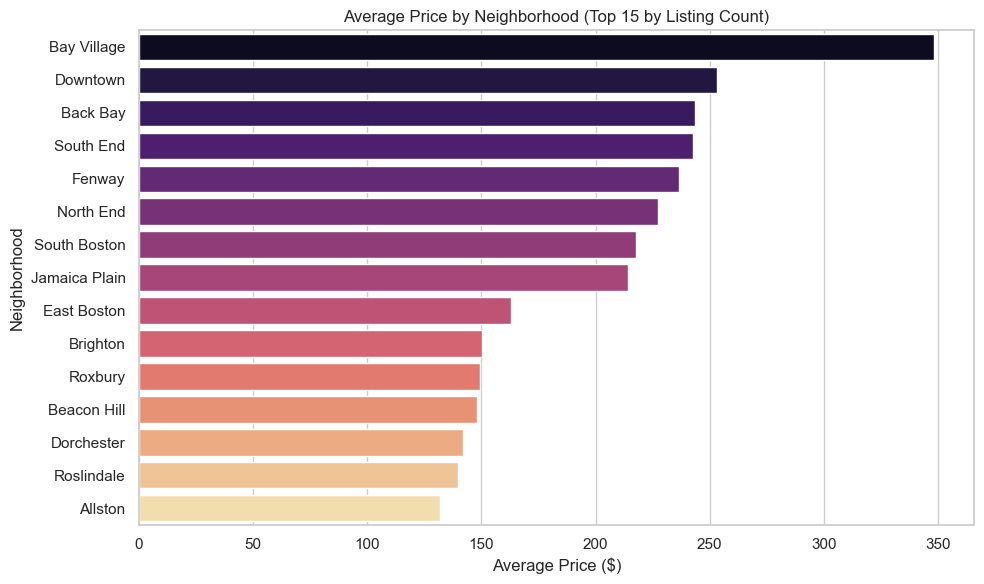

In [7]:
# Average price by top 10 neighborhoods

top_neighs = neigh_counts.index.tolist()
avg_price_neigh = listings_clean[listings_clean['neighbourhood'].isin(top_neighs)]
avg_prices = avg_price_neigh.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_prices.values, y=avg_prices.index, palette="magma")
plt.title("Average Price by Neighborhood (Top 15 by Listing Count)")
plt.xlabel("Average Price ($)")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.savefig("figures/avg_price_by_neighborhood.png")
plt.show()